# TA Review 2
*2/20/2024*

## FINM 37500 - 2024

### UChicago Financial Mathematics

* Burak Sekerci
* bsekerci@uchicago.edu

### Agenda
**Lecture 2 Topics**
- Multi Period Trees
- Caps/Floors
- Flat and Forward Volatility
 <br>

In [3]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '../cmds')
from binomial import *
from options import *

### Multi Period Trees

The first step in pricing an interest rate derivative is to model the interest rates themselves.

Two ways to think about it:
- Natural dynamics
- Risk neutral dynamics

With the natural dynamics of interest rates, we would still be left to estimate risk premia used in discounting cashflows.

Rather, we want to directly model the **risk-neutral** dynamics of the interest-rate process, with little reference to the natural dynamics.

In order to do that, we will set the p* to 0.5 and then twist the space so that the modeled interest rates fit this mold. 

Two approaches:
- Ho Lee: Which allows the rates to go negative due to it's non-log nature. 
- BDT: Uses the logarithm of the rates to evolve them within the tree. This approach would not allow for negative rates. Another feature of this model is that it would be hard to get low rates due to it's logarithmic nature. So maybe it is better to use in this high rate environment we are in currently.  

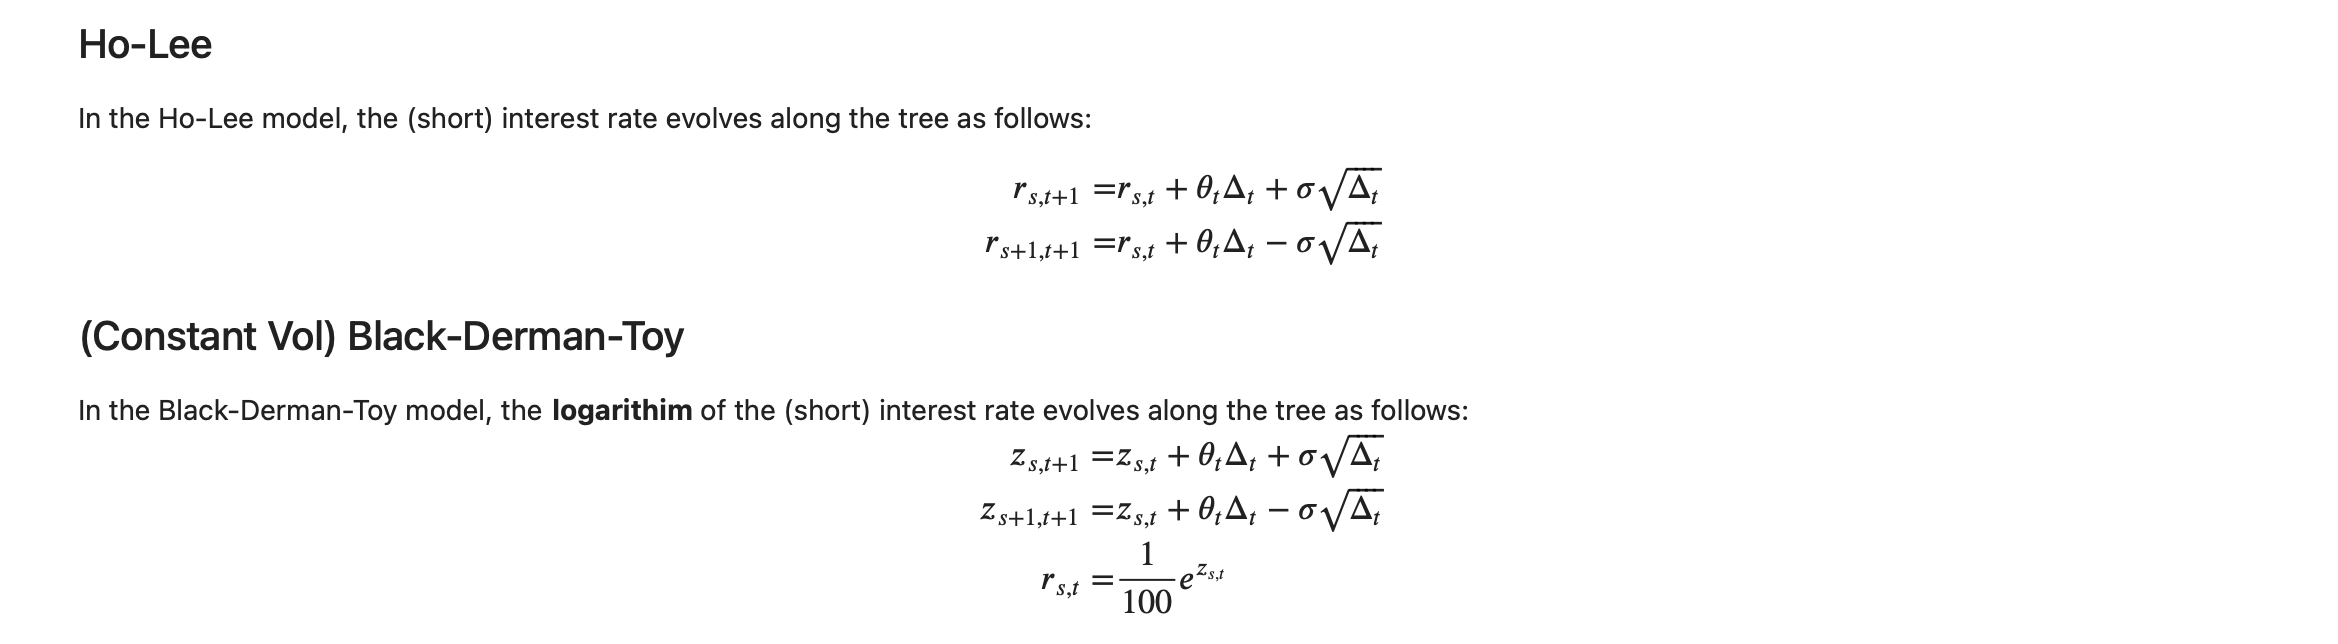

As you can see from the above formulas, both models evolve with three parameters:
- Short rate: The rate itself for Ho-Lee and logarithm of the rate for BDT. 
- Theta: The drift/trend of the rates over time
- Sigma: The volatility of the rates over time

#### Theta

We will be fitting this theta into the interest structure that we have in order to extract the drift at different maturities. If you take a look at the code that does this, it can be seen that fsolve is used at each time step with the bond quotes we have. 

#### Sigma:

We will talk about this later today, but essentially this parameter will come from market pricing, somewhat like how we get implied vol in options. 

For pricing derivatives we will use the structures above to build the interest rate trees, and then using the payoff functions of those derivatives we will build the pricing tree for the derivative at each timestep.

### Caps and Floors

 - Caps are made out of many caplets with the same strike but different maturities. A caplet is essentially a call option on an interest rate.
 - Floors are made out of many floorlets with the same strike but different maturities. A floorlet is essentially a put option on an interest rate. 
 - The payoffs are:

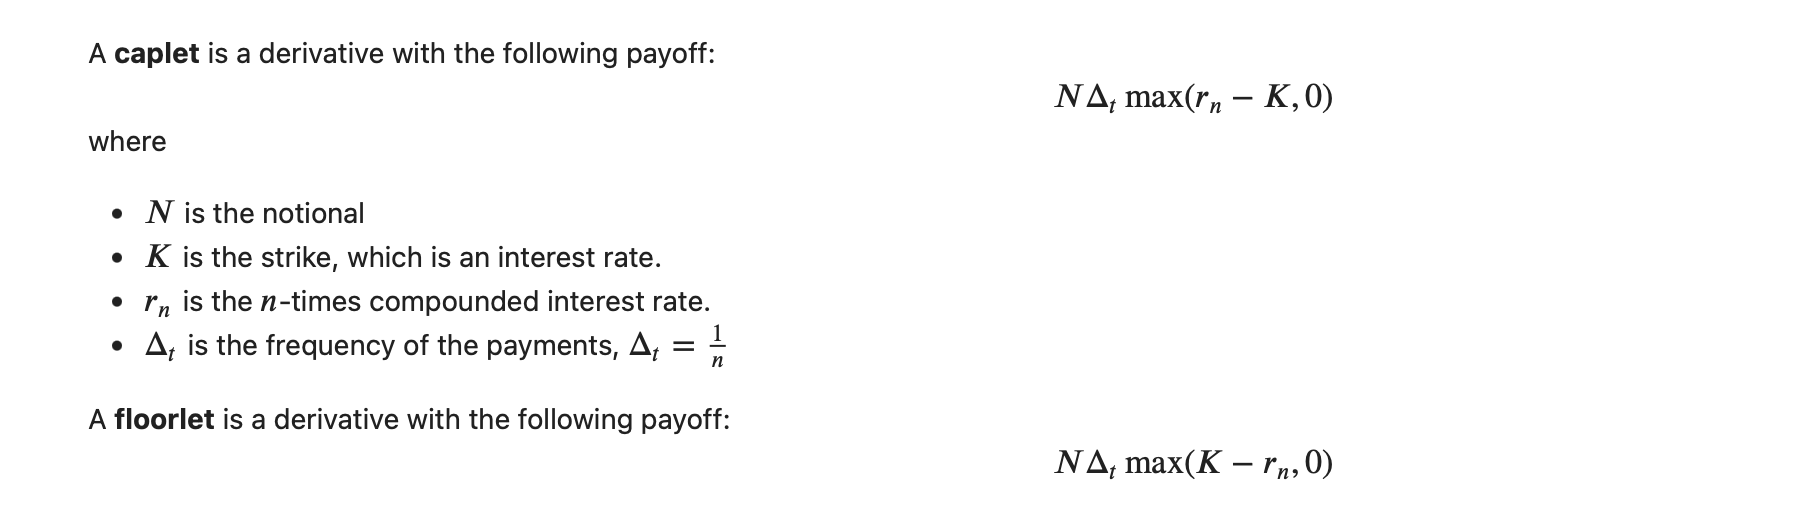

#### Key points to consider while pricing these under BDT assumptions:

 - BDT models continuously compounded rates. However a caplet/floorlet depends on semi annually compounded rates. To calculate the payoff of this derivative you need to have the semi annually compounded rates. However in order to discount those payoffs in order to get proper pricing, you will still need to use the continuously compounded rates. 
 - For a cap/floor, which is a combination of caplets and floorlets, the payments happen in arrears. Note:

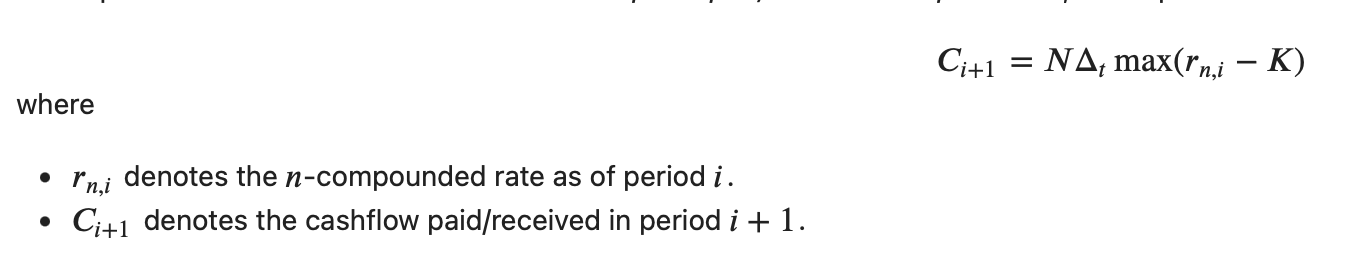

 - This means that the first caplet/floorlet is missing from the cap. The first caplet expires at T = 1. 
 - When pricing the cap/floor, we need to discount the final payoff by the risk-free rate.

### Flat and Forward Volatilities

Remembering from above, the interest rate dynamics were:
 - The short rate
 - Theta
 - Sigma

We discussed how to get theta, the drift, but not how to model the sigma. We can try to use natural-measure vol, but this would not lead to satisfactory pricing. We do have data on the prices of derivatives, and we can utilize this data to get the implied vol of these derivatives and then extracting those sigmas at each timestep. 

#### Flat vol:
- is the implied volatility that matches the market price of a given cap or a floor. 

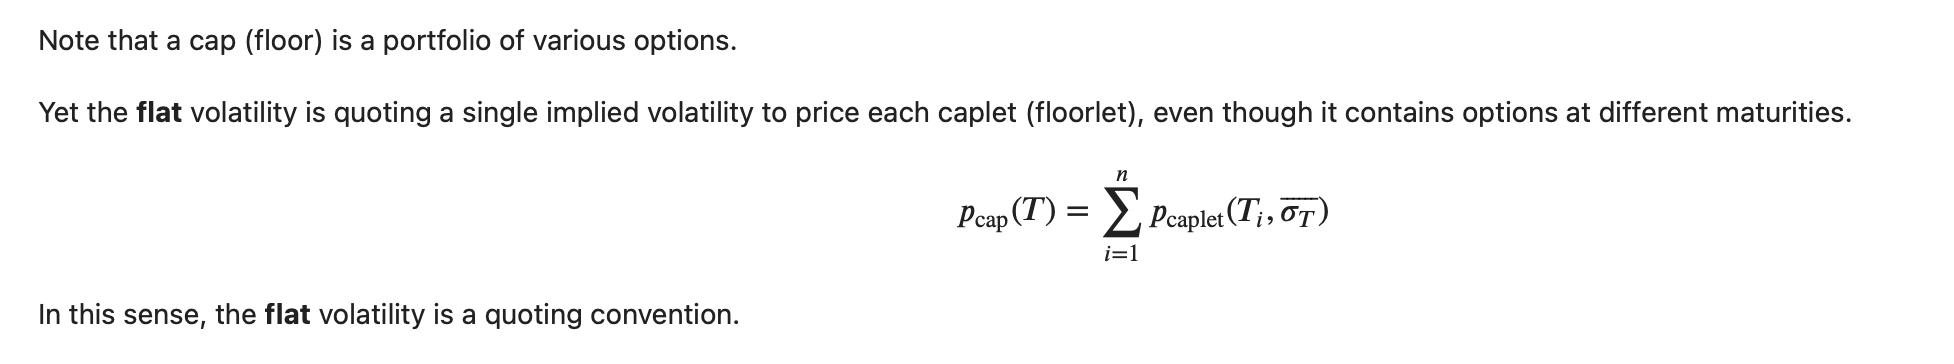

You can draw similarities to yield to maturity. The yield to maturity was a yield we used to price different cashflows at different maturities. Flat vol is similar in the sense that it assigns the same volatility to different caplets/floorlets maturing at different dates. It makes sense as an overall package but for individual caplets/floorlets it is inconsistent. 

#### Forward Vol: 

- is the volatility that can be applied to every caplet/floorlet at different maturities. 

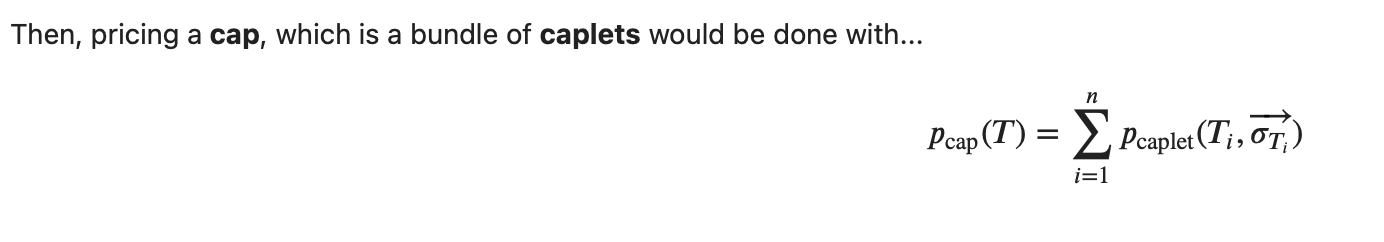

You can draw comparisons here with the spot rates. We will use these forward vols in order to value each caplet at a certain maturity. 

And very similar with what we did with extracting spot rates from bond prices, we can bootstrap forward vols from different caps. 

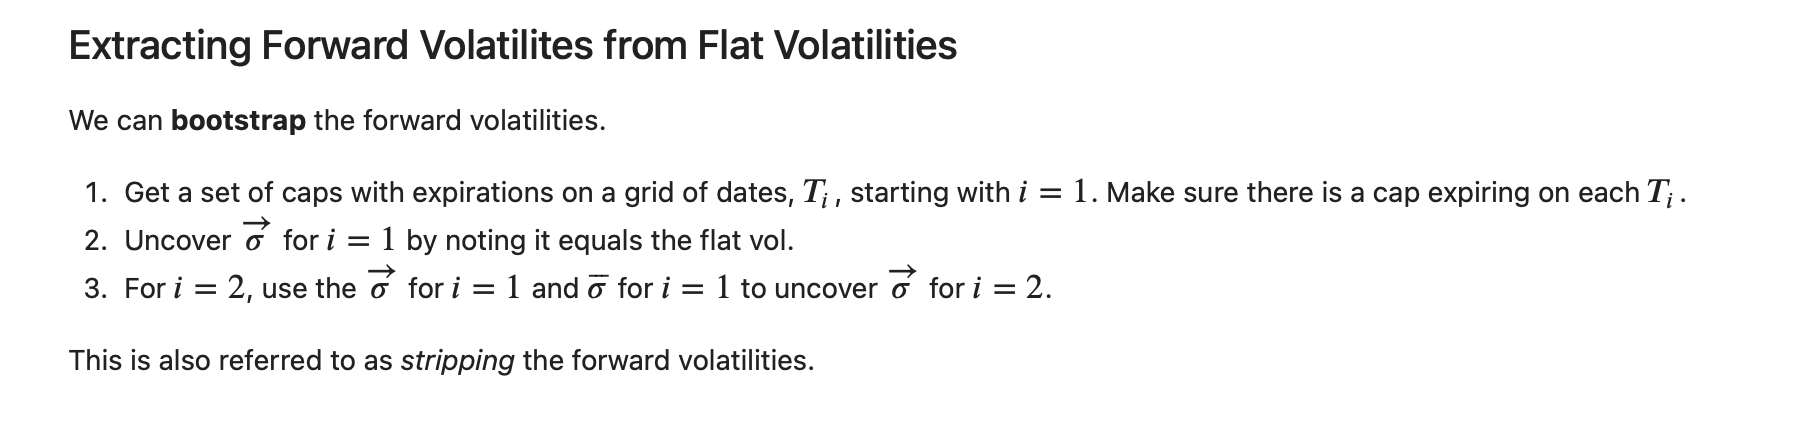

In order to utilize this in the BDT model: 

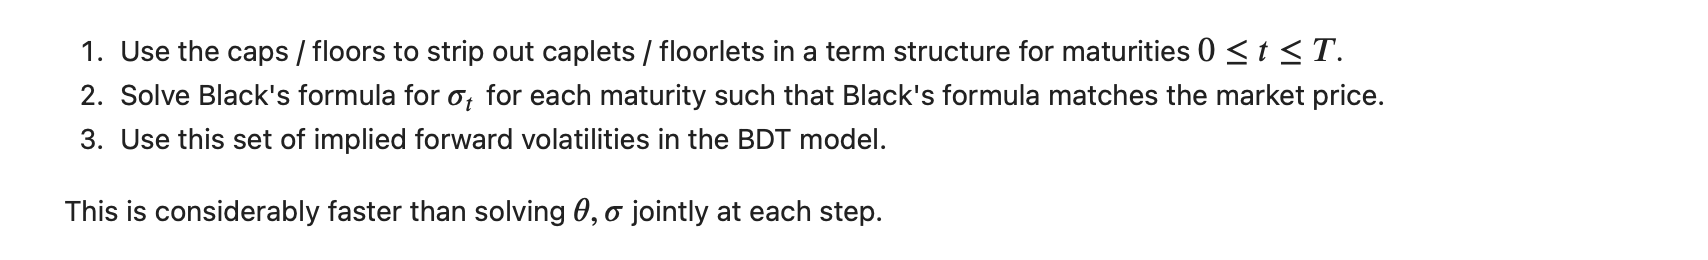